In [16]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [20]:
from matplotlib.pyplot import *
%matplotlib inline

In [21]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_10164/1606399738.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [7]:
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

In [8]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

In [9]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) +  ["class", "group"]


    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Cross-validation(CV) iteration",
        ylim=[n_splits, -0.2],
        xlim=[0, 100],
    )
    #ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot:xlabel='Sample index', ylabel='Cross-validation(CV) iteration'>

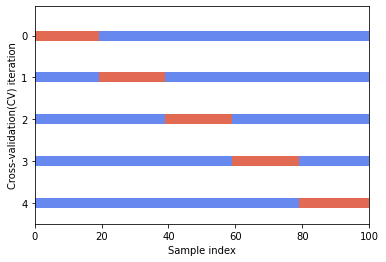

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, ax, n_splits)

In [13]:
from PIL import Image
import glob
import os
images = glob.glob("*.png")
print(images)
imlist = []
for img in images:
    im = Image.open(img)
    im = im.convert('RGB')
    imlist.append(im)
imlist[0].save('plots.pdf',save_all=True, append_images=imlist[1:])
map(os.remove(img),[img for img in images])

['5_CV.png']
